In [1]:
#import required libraries
import yfinance as yf
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib 
import datetime

# How have Scottish companies performed since 2015?
We wish to create an index to track the market performance of the 20 biggest listed Scottish companies, by market capitalisation, to identify their aggregate performance over the previous five years.

## What companies do we include?
We decide to include all UK listed companies headquartered in Scotland, including investment trusts. We select the first ten Scottish headquartered companies from the FTSE 100 and FTSE 250 indices, sorted by market capitalisation.

In [2]:
#get today's date
date=datetime.datetime.now()
today=date.strftime("%Y-%m-%d")
#allow pandas to use the yfinance library
yf.pdr_override()

In [3]:
#Lloyds Banking Group
lloy=pdr.get_data_yahoo("LLOY.L", start="2015-01-01", end=today)
#Royal Bank of Scotland Group
rbs=pdr.get_data_yahoo("RBS.L", start="2015-01-01", end=today)
#SSE
sse=pdr.get_data_yahoo("SSE.L", start="2015-01-01", end=today)
#Scottish Mortgage Investment Trust
smt=pdr.get_data_yahoo("SMT.L", start="2015-01-01", end=today)
#Standard Life Aberdeen
sla=pdr.get_data_yahoo("SLA.L", start="2015-01-01", end=today)
#Weir Group
weir=pdr.get_data_yahoo("WEIR.L", start="2015-01-01", end=today)
#Monks Investment Trust
mnks=pdr.get_data_yahoo("MNKS.L", start="2015-01-01", end=today)
#Wood Group
wg=pdr.get_data_yahoo("WG.L", start="2015-01-01", end=today)
#Edinburgh Investment Trust
edin=pdr.get_data_yahoo("EDIN.L", start="2015-01-01", end=today)
#FirstGroup
fgp=pdr.get_data_yahoo("FGP.L", start="2015-01-01", end=today)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## How did the companies perform individually?
We plot the closing share prices of the companies to reflect individual performance over the last ten years.

In [4]:
#create array of components
scot10comp=[lloy,rbs,sse,smt,sla,weir,mnks,wg,edin,fgp]
#store attributes of data
attributes=['Open','High','Low','Close','Adj Close','Volume']

In [5]:
#for each company, loop and plot close price
for i in range(0,10):
    scot10comp[i]['Close'].plot()

We can see that the different share prices make it difficult to draw comparisons. We can standardise each share, so the initial open on the 2nd of January 2015 is 100p.

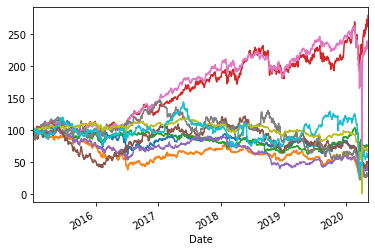

In [6]:
#loop through the companies
for i in range(0,10):
    #calculate the factor that will return the open price to 100p
    factor=100/scot10comp[i].iloc[0,0]
    for j in range(0,5):
        #loop through the price attributes, standardising the prices
        scot10comp[i][attributes[j]]=scot10comp[i][attributes[j]]*factor
    #plot the resulting prices
    scot10comp[i]['Close'].plot()

## How do we bring the companies together?
We now have to think about combining the share prices of these 10 companies to identify the performance of Scotland's largest companies as a whole. We do this by creating our index, *SCOT10*, whose initial price is 1000p.

In [7]:
#use lloy as a starting point
scot10=lloy
#again, loop through the companies, excluding lloy
for i in range(1,10):
    #loop through attributes
    for j in range(0,6):
        scot10[attributes[j]]=scot10[attributes[j]]+scot10comp[i][attributes[j]]

Now, we can plot the close price of the index over the time period.

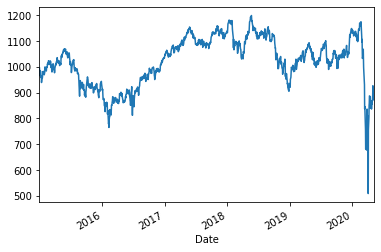

In [8]:
scot10['Close'].plot()

## How did SCOT10 perform against the wider UK stock market?
We now plot the closing prices of the SCOT10 index against the FTSE 100 index, which contains the largest UK companies.

[*********************100%***********************]  1 of 1 completed


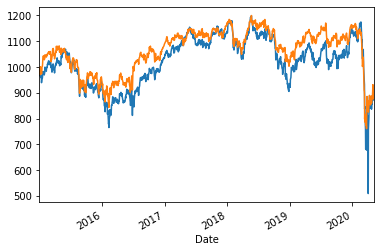

In [9]:
#fetch the FTSE 100
ftse100=pdr.get_data_yahoo("^FTSE", start="2015-01-01", end=today)
#standardise the FTSE 100 prices to initially 1000p
factor=1000/ftse100.iloc[0,0]
for i in range(0,5):
    #loop through the price attributes, standardising the prices
    ftse100[attributes[i]]=ftse100[attributes[i]]*factor
#plot the two indices
scot10['Close'].plot()
ftse100['Close'].plot()